In [1]:
from fycharts.SpotifyCharts import SpotifyCharts
import numpy as np
import pandas as pd
import sqlalchemy
import matplotlib
from matplotlib import pyplot as plt
from datetime import date, timedelta
import requests
from dotenv import load_dotenv
import os
import json
import urllib.parse

In [192]:
 """
1. create .env file
2. Paste your Spotify OAuth Token:
TOKEN=%{OAuth_Token}

it is included in .gitignore, don't change it 😊
"""
load_dotenv(verbose=True)
spotify_token = os.getenv("TOKEN")

In [66]:
df = pd.read_csv("2020-2021_daily_top_200.csv")
df.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1.0,The Box,Roddy Ricch,1812103.0,2020-01-01,us,0nbXyq5TXYPCO7pr3N8S4I
1,2.0,ROXANNE,Arizona Zervas,1400495.0,2020-01-01,us,696DnlkuDOXcMAnKlTgXXK
2,3.0,Circles,Post Malone,1186861.0,2020-01-01,us,21jGcNKet2qwijlDFuPiPb
3,4.0,BOP,DaBaby,1130123.0,2020-01-01,us,6Ozh9Ok6h4Oi1wUSLtBseN
4,5.0,Bandit (with YoungBoy Never Broke Again),Juice WRLD,968612.0,2020-01-01,us,6Gg1gjgKi2AK4e0qzsR7sd


In [67]:
def get_headers():
    return {'Authorization' : 'Bearer {}'.format(spotify_token),
            'Content-Type': 'application/json',
            'Accept': 'application/json'}

In [68]:
def get_artist_id_by_track_id(track_id):
    pass

In [69]:
def get_albums_of_tracks(ids):
    endpoint = "https://api.spotify.com/v1/tracks?ids="
    for i, track_id in enumerate(ids):
        endpoint += track_id
        if i != len(ids) - 1:
            endpoint += ","        
    response = requests.get(endpoint, headers=get_headers())
    tracks = json.loads(response.text)['tracks']
    track_album = {}
    for track in tracks:
        album = track['album']
        album_id = album['id']
        track_album[track['id']] = album_id
    return track_album

In [70]:
def get_tracks_from_album(album_id):
    endpoint = 'https://api.spotify.com/v1/albums/{}/tracks'.format(album_id)
    response = requests.get(endpoint, headers=get_headers())
    track_ids = []
    response_dict = json.loads(response.text)
    for item in response_dict['items']:
        track_ids.append(item['id'])
    return track_ids


In [71]:
def get_track_features(track_id):
    endpoint = "https://api.spotify.com/v1/audio-features/{}".format(track_id)
    response = requests.get(endpoint, headers=get_headers())
    return json.loads(response.text)

In [74]:
def extract_relevant_features(audio_features):
    relevant_audio_features = ['danceability', 'energy', 'loudness',
                               'speechiness', 'acousticness', 'instrumentalness',
                               'liveness', 'valence','tempo', 'duration_ms', 'id']
    relevant_features_dict = {}
    for key in relevant_audio_features:
        relevant_features_dict[key] = audio_features[key]
    return relevant_features_dict

In [75]:
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [76]:
get_track_features('06AKEBrKUckW0KREUWRnvT')

{'danceability': 0.735,
 'energy': 0.578,
 'key': 5,
 'loudness': -11.84,
 'mode': 0,
 'speechiness': 0.0461,
 'acousticness': 0.514,
 'instrumentalness': 0.0902,
 'liveness': 0.159,
 'valence': 0.636,
 'tempo': 98.002,
 'type': 'audio_features',
 'id': '06AKEBrKUckW0KREUWRnvT',
 'uri': 'spotify:track:06AKEBrKUckW0KREUWRnvT',
 'track_href': 'https://api.spotify.com/v1/tracks/06AKEBrKUckW0KREUWRnvT',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/06AKEBrKUckW0KREUWRnvT',
 'duration_ms': 255349,
 'time_signature': 4}

In [77]:
get_albums_of_tracks(['06AKEBrKUckW0KREUWRnvT'])

{'06AKEBrKUckW0KREUWRnvT': '7q4gKzB9XsZ4MfGj4RYQko'}

In [78]:
get_tracks_from_album('7q4gKzB9XsZ4MfGj4RYQko')

['6SwXICYZzMIF3bPiNqJzoW',
 '06AKEBrKUckW0KREUWRnvT',
 '2nNJuGe5XnZ6PFiZtRZwXK',
 '3xBZhSBqwBb5I1tm1rFb1M',
 '5jA76jyQUK3bnNMxpph17U',
 '6jGl5VGXvCKjZaDNITxHEG',
 '4X6o4n13BRCmIA04hem6i0',
 '6UzuMbbaRImnQVebKqcA4X',
 '10kFzNWeZ8wbwd9mtkf6ri',
 '57uuBOTCBdLi6GLPgEN7sV',
 '1Tpz0Sm8oBZ0AmBMmCWJ61',
 '1W7BqCXK3mZvbwHH0ic880']

In [79]:
us_df = df[df['region'] == 'us']
top_tracks_ids = set(us_df['spotify_id'].values)
print(len(top_tracks_ids))

2689


In [40]:
albums = []
for chunk in chunks(list(top_tracks_ids),4):
    ids = get_albums_of_tracks(chunk).values()
    albums.extend(ids)


In [41]:
all_tracks = []
for album in albums:
    tracks = get_tracks_from_album(album)
    all_tracks.extend(tracks)    

5lJqux7orBlA1QzyiBGti1
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5lJqux7orBlA1QzyiBGti1
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6EgJXcGqaUvgZIF9bqPXfP
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4WE4KsdoZbISWStEzfcxvH
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1IoPOM6tK3gjUe5s9taAaA
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3Hz3XGYtM6rcRIPBJVAury
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1ynyQdPQiXdYJNQEDL1S3d
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6uhEg4ASZYLIilZFCBFy1r
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
69K1zrf6TkXHdYUO8n2qVi
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7GBwVFeuN4IJcsuoYJKlEl
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7yf9ZJyHRbp8sHtpDKfPpt
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2eLpj5EDUhyAoTks8sxcKR
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2qehskW9lYGWfYb0xPZkrS
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7z4GhRfLqfSkqrj5F3Yt2B
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2nndXLmS4C16yX7UJBWW2U
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
34wa3zf2prXFMk47t9zHFG
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0bJIHF1Or1YBLFBMwv53K2
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3XzSOIE6zGLliuqsVGLmUc
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5GnCVEvwaFZPogirSgrrtv
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
12BBYEXH7hGF6io8xNuXSJ


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6LBPsXUjVuNe9ywLY4xgvX
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2sD4s8plx7sdr7Qn580kK6
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7mdpibDh6Sec6o6zItcSEH
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2d9BCZeAAhiZWPpbX9aPCW
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6JlCkqkqobGirPsaleJpFr
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5SxEsi1PNyo1XfEKDYcFKF
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0fxhOwMkj9lfSIAyTJVnfc
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5jlE1zlhT3mEWw0mRpN920
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2QRedhP5RmKJiJ1i8VgDGR
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5QakU0QMcoxjjyCS1YW4G5


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0g1F5eGVwX4Sxi1n8ojPkE
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5bfpRtBW7RNRdsm3tRyl3R
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6mJZTV8lCqnwftYZa94bXS
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6C9WzlQANeoD0GW5B41YJt
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1wSmi4DMuPu5fG7xtyspT2
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3YjfdLdpQcVI72uKhooZst
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1ynyQdPQiXdYJNQEDL1S3d
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
34LUTyhy4RZkfjvnF0gWu4
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3raeLaYMyhfb67HgnnNrsg
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6IVb2rS8oFgQcKp3RM2vOd


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
42WVQWuf1teDysXiOupIZt
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1R6vbGGXSEZZmTGn7ewwRL
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
42SNLQYdeiybSNLIxVA2yn
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7zbu593gOe2GxgAmeXKWmw
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6YKk4wlKdACRITGKmGnoIm
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0zhGddZ83RpCgnelKWa2qS
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
17xtwQqIkV3lbQNlzDVFuC
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5SxEsi1PNyo1XfEKDYcFKF
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1ynyQdPQiXdYJNQEDL1S3d
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5g9YhHW8tE7Tcslgxsk5u9


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5Ew5vOg3PYyT9QUPCrdIZq
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
78dIoWjdZvWcgKNxEgIDL4
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2yuQqhSklmfWgn8lmJNk5t
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2QRedhP5RmKJiJ1i8VgDGR
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
655K6xPQko0QunUAClwrLq
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2NuZ1TloomufyKf57ZLBQn
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5nQhqsmAirtZqHID6tkcnh
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5g2INX6dnMIJG0xKygXwF3
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4j2syEjl3h1To8KbRgvmJn
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
76290XdXVF9rPzGdNRWdCh


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1R6vbGGXSEZZmTGn7ewwRL
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
39xhYyNNDatQtgKw2KdXMz
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
623PL2MBg50Br5dLXC9E9e
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6645HGh7ZOZSUTpqW9iYLR
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6YKk4wlKdACRITGKmGnoIm
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7z4GhRfLqfSkqrj5F3Yt2B
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3bmh4Kcn9Aoxmfg7yMGgBQ
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5tF7JnL3vVYaKap77UUz6p
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4nndDRqggBACyN5dw13kDI
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6mhlquPOu46v4c7nXS35mX


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3REUXdj5OPKhuDTrTtCBU0
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4yP0hdKOZPNshxUOjY0cZj
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3CKVXhODttZebJAzjUs2un
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6slkiHeFK3wW2D1mao0TX3
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
35K2EC0ekebCHw5sHn5i1B
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
05c49JgPmL4Uz2ZeqRx5SP
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3w6QeihCf2l0zZMBLagxDj
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5G5REmjJkoZaLNtbhPWQng
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2D0Hi3Jj6RFnpWDcSa0Otu
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2m5J1DUH7hJpPSOromIqpN


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
63VE57Ol6fcAC0fb6kGx5y
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1d0b8HYGGtpsvlAzLR9puz
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0zhGddZ83RpCgnelKWa2qS
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
31IDBea3eEs57a0joX6TjN
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4g1ZRSobMefqF6nelkgibi
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7xV2TzoaVc0ycW7fwBwAml
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3r4C6wYkCYL65QjkU5oJ8y
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
12TuxCWI6BzfSXaZMKMrPn
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2gWDbNPfFcIR1EewwlvyqJ
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6KT8x5oqZJl9CcnM66hddo


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
31qVWUdRrlb8thMvts0yYL
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1bnHPO4dKK7IjvgrtVBcQh
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6JlCkqkqobGirPsaleJpFr
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6mJZTV8lCqnwftYZa94bXS
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2fenSS68JI1h4Fo296JfGr
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2SOQX9qSOQhxc0PsI5LNnu
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
57mRzPwzFz7cnnuDM4rHMU
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6YKk4wlKdACRITGKmGnoIm
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2Xoteh7uEpea4TohMxjtaq
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
52u4anZbHd6UInnmHRFzba


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
71O60S5gIJSIAhdnrDIh3N
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1qG59RwEkOPPtBYPU9E2iv
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0cZAE6guibfcYmTZD7hiae
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3YjfdLdpQcVI72uKhooZst
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3Lp4JKk2ZgNkybMRS3eZR5
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5zCvAq0MLqUv0vE96iMbv2
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0KjckH1EE6HRRurMIXSc0r
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6MbQdX6OomgQhZU6QCqMKW
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6mhlquPOu46v4c7nXS35mX
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1gDgPEEeuFPfRMASQWU8A0


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
54V1ljNtyzAm053oJqi0SH
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
39xhYyNNDatQtgKw2KdXMz
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
67nqYhvjDyJXGD64937Lw3
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2d9BCZeAAhiZWPpbX9aPCW
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
68enXe5XcJdciSDAZr0Alr
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7yCXgxWLZZEAiVsISKN3BF
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7JtT7OyWM8BnIS5FXXPMKg
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0mXuESYo2Gd1quvVflixyi
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7IyoGB8J31fvQDwGtHAq9m
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5vjOhA7AkB9WK7I2NnzIex


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5sY6UIQ32GqwMLAfSNEaXb
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0xS0iOtxQRoJvfcFcJA5Gv
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7vif3nVzXURIrjGjHeHytB
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1xRcR4iSouBrfVhuqFkPAJ
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6MbQdX6OomgQhZU6QCqMKW
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0F4bzfGxyxDT5xdKUAUfhN
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6SL49HqoUwu2hhfukBAK3Q
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1qW1C4kDOXnrly22daHbxz
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5lJqux7orBlA1QzyiBGti1
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5Or2XM0Gjy6Y8qlaERqsSn


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4otkd9As6YaxxEkIjXPiZ6
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3euz4vS7ezKGnNSwgyvKcd
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5vRoBEolA8ng3JUw3HQjMG
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5Vdzprr5cOqXQo44eHeV7t
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
24jAbLMFzCTlIv3kQ94HwK
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0A9eIFTz09ciHqCHJNYyf2
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3C3y6dQRzr9ibPGdZk1f05
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1R6vbGGXSEZZmTGn7ewwRL
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3rA5CgccCbmCnJEzwGnDea
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
38VJmvRNp32qPiQTJkWtJB


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
25paSmOYSF03s81DCNqQn3
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
03NCvBIGqzLPhLoi4pDb3L
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2d9BCZeAAhiZWPpbX9aPCW
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0Jh3A8NAbc9eFpdUfhDedt
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0gA0nZrZ55PLUp7ARfrICu
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
68enXe5XcJdciSDAZr0Alr
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5zCvAq0MLqUv0vE96iMbv2
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0FgZKfoU2Br5sHOfvZKTI9
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5jmVg7rwRcgd6ARPAeYNSm
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
600ClrWRsAr7jZ0qjaBLHz


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6mJZTV8lCqnwftYZa94bXS
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0sOeI7pbAmIc8aDFyvkBUW
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0WbfaztYJGyHiW3W9qe5Xw
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3o5M2OXfUVRsUFrd7u4a5K
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6slkiHeFK3wW2D1mao0TX3
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0KjckH1EE6HRRurMIXSc0r
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6ROLwnmW9pOioLned0DaP3
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2ODvWsOgouMbaA5xf0RkJe
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4sNUsOgeZWATonQ2vjoQKB
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4MZnolldq7ciKKlbVDzLm5


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1ynyQdPQiXdYJNQEDL1S3d
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2pJHbQp6ukEwbte0oS6Nm4
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4Wb5bU9FkmZ84WkkL37rKA
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1ATL5GLyefJaxhQzSPVrLX
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4otkd9As6YaxxEkIjXPiZ6
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
63iWSELt9V1kV6RSMxN7Ii
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7m7F7SQ3BXvIpvOgjW51Gp
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
56Abu6NLfNM5X7rJhrUdO4
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6JlCkqkqobGirPsaleJpFr
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
389zGArsMlwuPorS4Cw7IX


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
01GR4NL5O5CZM51k0aejKD
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3oIFxDIo2fwuk4lwCmFZCx
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7fJJK56U9fHixgO0HQkhtI
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1Sf8GsXG32t0jNrX11xqWx
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
01FCoGEQ3NFWF4fHJzdiax
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1kCHru7uhxBUdzkm4gzRQc
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3jCcsG6jkQTnUJyCACAg0r
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0O1PJ0t69iTO5yWrIeIga0
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3LN2EXddZ3AtoPksRtLZRS
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2bY51cinHBlscXIoLUsDYa


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6d1vGZsr6Uy3h9IigBpPAf
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0z0z4DcXhHiobX5ZKAw8Qn
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7eed9MBclFPjjjvotfR2e9
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0S9D5NIDp2YXhYwlvuJzqx
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6AORtDjduMM3bupSWzbTSG
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5TNzBp7QYsXIHrI5xxVuic
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6fLur4KDfJ782l1m05kLWx
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7krAqKWEJpVnJfH4eOqA6F
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7HXqq0fokRpOKG0bQW4xnB
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
600ClrWRsAr7jZ0qjaBLHz


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2MDU46hcBn3u94s46BOSdv
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4qYPknuYBlnDaHsUchr7z3
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1zbH0DnpYxaoqTojXNLQb6
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5lJqux7orBlA1QzyiBGti1
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3C5JkDI9fDqS9BZd0lNsma
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7p1fX8aUySrBdx4WSYspOu
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5lJqux7orBlA1QzyiBGti1
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2O985DZAb4i6M6iu4HWqSX
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0KjckH1EE6HRRurMIXSc0r
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4pmyFpGicLLIgNPc1TQXKc


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2x657XotA7LCsPElXmXX4W
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1C9zDYqWpx7Lqcsu81DV6Y
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6bUxh58rYTL67FS8dyTKMN
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
68enXe5XcJdciSDAZr0Alr
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7e7t0MCrNDcJZsPwUKjmOc
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6YKk4wlKdACRITGKmGnoIm
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2T8UlI17u5hwTqu6zkpkW7
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4Vd7lpztpJdmMt9hrLfXWe
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3ZJSoxsPMkNC9eb6gUn0Q8
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5658aM19fA3JVwTK6eQX70


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
66QwiCFDLtRbrZ5Vs9wlL9
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1AvXa8xFEXtR3hb4bgihIK
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6ROLwnmW9pOioLned0DaP3
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7e7t0MCrNDcJZsPwUKjmOc
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7vRcickwa6GCfY1qKKe4lK
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4g1ZRSobMefqF6nelkgibi
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1rfORa9iYmocEsnnZGMVC4
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0uLz2ygHQAtLknyGasJOr5
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
48xpWR8K6CGpy3ETAym3pt
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5vjOhA7AkB9WK7I2NnzIex


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
68enXe5XcJdciSDAZr0Alr
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1ynyQdPQiXdYJNQEDL1S3d
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5vjOhA7AkB9WK7I2NnzIex
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
25gJpQKgXxT5CrMitr0DQO
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1R6vbGGXSEZZmTGn7ewwRL
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2cULL7lcy0pCCpCRJsUZck
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6JISV6SiJtQnIsNC6OVpUf
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0dwXkSf1hMjZgqKUkeoR4l
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
02NYB7JtjRJV7FWsl4Cdar
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4JxgricHyH0BbMUaefAHfR


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4RCSDGVMSrMZXgHre4W3oa
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4sD1qg4jwTZR4mvR4Iflk5
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0t70lpfTyHEv0uuq21fhdZ
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0gA0nZrZ55PLUp7ARfrICu
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2d9BCZeAAhiZWPpbX9aPCW
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1V9QpD8kjA2iHCElhFGvlo
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1Li4rADxSxjT2g4xqUcMYh
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4uTOUYhLrGRKkfxfPKTkuy
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6mhlquPOu46v4c7nXS35mX
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
05b4SazhZ2bZFxV5fWi54E


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3sRPj5WMTrlTy2vTJW3BKx
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3W04W2HfQ5kVeByxfjbu2C
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4xmJCh7ct63QvQ5wRc44db
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7xV2TzoaVc0ycW7fwBwAml
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5lJqux7orBlA1QzyiBGti1
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4MiEmYcutgLqNjKvBpuAZT
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4otkd9As6YaxxEkIjXPiZ6
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3XGx6BABeDvmtVA4k0wfCl
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3WdCWL7bYtiSLRAlxxq1Q2
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1fSr7CMs4ewhuylB6NZCPo


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3C5JkDI9fDqS9BZd0lNsma
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5wtE5aLX5r7jOosmPhJhhk
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2CMlkzFI2oDAy5MbyV7OV5
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4ZZvKnA1YJ2KcwjMmHBinq
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6CWrbkVYhETLuzaDze33yo
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0S9D5NIDp2YXhYwlvuJzqx
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4Kd33JPxTOcjTM29FrKoyT
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1jcNHi5D96aaD0T5f1OjFY
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4otkd9As6YaxxEkIjXPiZ6
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2d9BCZeAAhiZWPpbX9aPCW


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7z4GhRfLqfSkqrj5F3Yt2B
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0tKX7BLXiiRgXUKYdJzjEz
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7JtT7OyWM8BnIS5FXXPMKg
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5gdoRB1AUsGnScCuZ8gmPp
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2CYr9450iYkEWq4IWL8plY
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6n9DKpOxwifT5hOXtgLZSL
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7DaO2NczGej6crL0eTAXcS
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2wVTLpA19kpk5qmkTASir0
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6zk4RKl6JFlgLCV4Z7DQ7N
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
57lgFncHBYu5E3igZnuCJK


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2vMi9So8GxXiqaT2zJXbQG
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5jmVg7rwRcgd6ARPAeYNSm
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6ROLwnmW9pOioLned0DaP3
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3MKvhQoFSrR2PrxXXBHe9B
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0rSLgV8p5FzfnqlEk4GzxE
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7MkNlHw0O8KKr3yJ3RtgVW
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4otkd9As6YaxxEkIjXPiZ6
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7B36GsLpC6IogfPjjkRlj3
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0zAQaPkiCixDziyj0hnzEI
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6PBZN8cbwkqm1ERj2BGXJ1


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4NPX54YtocHqTOq6yXDEFM
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2d9BCZeAAhiZWPpbX9aPCW
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5GugLrmYMl5VRoe2zNgLGp
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6wTyGUWGCilBFZ837k5aRi
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6CqsldZjVGphwQk9wEBiKE
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
57lgFncHBYu5E3igZnuCJK
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1V9oE8bVilClrk5naqyyvL
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
03WHzx89aK1pKO9GZzlSH7
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6JlCkqkqobGirPsaleJpFr
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1s3Fi0Esr37lOvmigDbMkv


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
03lAqSRgMwLppPB6M7qzAE
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5mUdh6YWnUvf0MfklEk1oi
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1uqIpwAQm1XQ7LKHBREK1Q
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
71O60S5gIJSIAhdnrDIh3N
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1zHR48K6XtWYm6bhrw4J6C
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1R6vbGGXSEZZmTGn7ewwRL
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0S0KGZnfBGSIssfF54WSJh
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2uqdv3ixmTDSnH1sZFk3y9
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
43yC4eriRHqTxGpb364KaR
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7nvANymVllz1oUQYUotMVf


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1rPgTGV5Hq3GNmlGl0iGqq
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3GPiefSRSOxqTrgKJIB7RL
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5vRoBEolA8ng3JUw3HQjMG
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
0sFuW4rH5mFZUjNKnckO3v
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
64nbgEEIcY4g1ElVLONJ0w
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6n9DKpOxwifT5hOXtgLZSL
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
7lqieLm717j9Z8JrG7POkS
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
368tzVdeju4vLSY8PHnQUs
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
74vajFwEwXJ61OW1DKSPEa
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
752RRPgpiIBjptbb1BqoRI


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
1LVNYhjG7hkowdUwgwOdXj
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
05c49JgPmL4Uz2ZeqRx5SP
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6Nk3nZofAejUk9rfYj7SHV
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
54ootLtDyMZFr9obtWQvvO
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
39xhYyNNDatQtgKw2KdXMz
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6YKk4wlKdACRITGKmGnoIm
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5ztLxyZw32EKfv0Kw5ZLRj
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6OQ9gBfg5EXeNAEwGSs6jK
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3PWTw7MPyvU80Z6pDgHUaC
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2x657XotA7LCsPElXmXX4W


dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6JlCkqkqobGirPsaleJpFr
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6bhDYrLxUl1AocYR05p91R
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5VdyJkLe3yvOs0l4xXbWp0
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6b3LhhX9Lt2861Dsh3ZCC2
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
6mhlquPOu46v4c7nXS35mX
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
4wquJImu8RtyEuDtIAsfcE
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
3MKvhQoFSrR2PrxXXBHe9B
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
5qeikHFUgeO8f8HXm8k4cA
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2xkZV2Hl1Omi8rk2D7t5lN
dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])
2x657XotA7LCsPElXmXX4W


In [82]:
rows = []
for track in all_tracks:
    try:
        features = extract_relevant_features(get_track_features(track))
        features['viral'] = track in top_tracks_ids
        rows.append(features)
    except Exception as e:
        print(e)

Expecting value: line 1 column 1 (char 0)
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
Expecting value: line 1 column 1 (char 0)
Expecting value: line 1 column 1 (char 0)
Expe

'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceabil

'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceabil

'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceabil

'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceabil

'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceabil

'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceabil

'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceabil

'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceabil

'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceabil

'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceabil

'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceability'
'danceabil

In [105]:
dev_data = pd.DataFrame(rows)

In [106]:
len(dev_data)

25171

In [107]:
dev_data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,id,viral
0,0.900,0.603,-5.313,0.0646,0.4020,0.000005,0.1340,0.824,129.928,170972,41wtwzCZkXwpnakmwJ239F,True
1,0.685,0.848,-4.561,0.0858,0.0861,0.000007,0.0783,0.761,179.870,163084,6NfrH0ANGmgBXyxgV2PeXt,True
2,0.882,0.612,-6.103,0.1180,0.0475,0.000005,0.1820,0.742,147.982,160638,75pQqzwgCjUOSSy5CpmAjy,True
3,0.744,0.868,-4.524,0.0470,0.0326,0.000000,0.0822,0.586,93.037,206420,69vlMrzHwATKzupwNcUPyK,True
4,0.860,0.758,-5.160,0.0695,0.0210,0.000065,0.3440,0.453,97.014,172127,0SqqAgdovOE24BzxIClpjw,True


In [108]:
len(dev_data[dev_data['viral'] == False])

11003

In [109]:
dev_data.to_csv('us_2020_top200.csv')

In [146]:
dev_data = pd.read_csv('us_2020_top200.csv', index_col=0)

In [147]:
dev_data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,id,viral
0,0.900,0.603,-5.313,0.0646,0.4020,0.000005,0.1340,0.824,129.928,170972,41wtwzCZkXwpnakmwJ239F,True
1,0.685,0.848,-4.561,0.0858,0.0861,0.000007,0.0783,0.761,179.870,163084,6NfrH0ANGmgBXyxgV2PeXt,True
2,0.882,0.612,-6.103,0.1180,0.0475,0.000005,0.1820,0.742,147.982,160638,75pQqzwgCjUOSSy5CpmAjy,True
3,0.744,0.868,-4.524,0.0470,0.0326,0.000000,0.0822,0.586,93.037,206420,69vlMrzHwATKzupwNcUPyK,True
4,0.860,0.758,-5.160,0.0695,0.0210,0.000065,0.3440,0.453,97.014,172127,0SqqAgdovOE24BzxIClpjw,True


In [148]:
targets = dev_data['viral'].values
del dev_data['id']
del dev_data['viral']
X = dev_data

In [149]:
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.900,0.603,-5.313,0.0646,0.4020,0.000005,0.1340,0.824,129.928,170972
1,0.685,0.848,-4.561,0.0858,0.0861,0.000007,0.0783,0.761,179.870,163084
2,0.882,0.612,-6.103,0.1180,0.0475,0.000005,0.1820,0.742,147.982,160638
3,0.744,0.868,-4.524,0.0470,0.0326,0.000000,0.0822,0.586,93.037,206420
4,0.860,0.758,-5.160,0.0695,0.0210,0.000065,0.3440,0.453,97.014,172127


### PCA Analysis

In [150]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
X_scaled = scale(X.values)
pca = PCA()

In [151]:
X_transformed = pca.fit_transform(X_scaled)

In [152]:
X_transformed.shape

(25171, 10)

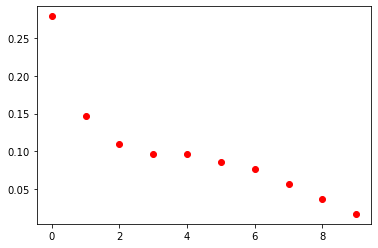

1 components: 0.2787961546372526
2 components: 0.4249558996455455
3 components: 0.5342955664533616
4 components: 0.6307222846349558
5 components: 0.7267722749260863
6 components: 0.8129345145606569
7 components: 0.8895574740894766
8 components: 0.9462913257694925
9 components: 0.9827289118033138
10 components: 1.0


In [156]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
for i in range(1, 11):
    print("{} components:".format(i), sum(variance_ratio[0:i]))

In [164]:
def plot_vectors(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(20,20))
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'b', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'b', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [165]:
attributes = dev_data.columns.values
attributes

array(['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'], dtype=object)

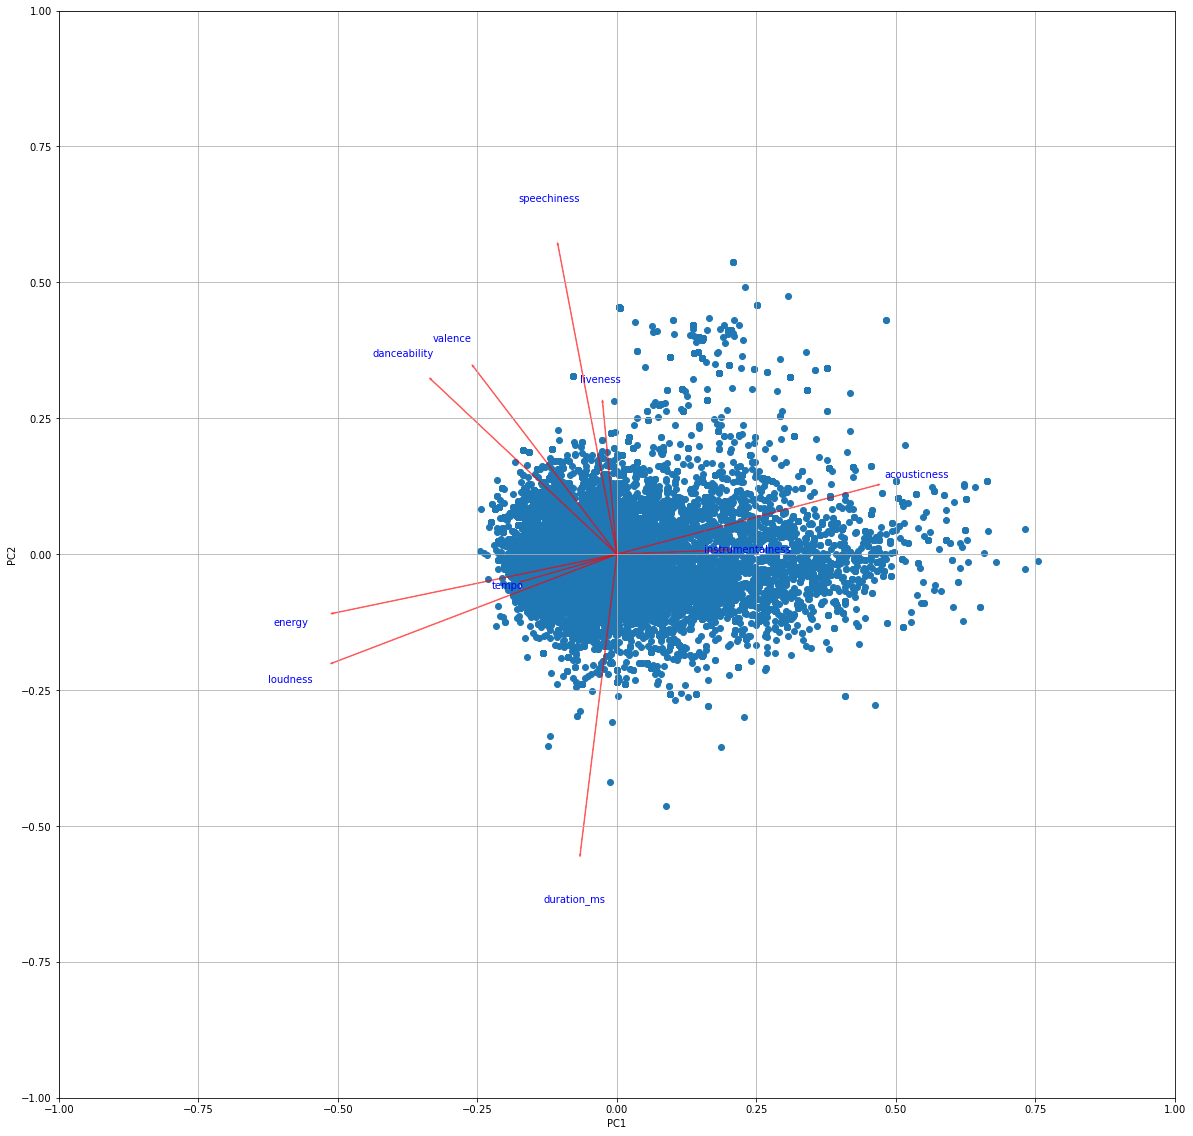

In [170]:
plot_vectors(X_transformed[:,0:2],np.transpose(pca.components_[0:2, :]),labels = attributes)
plt.show()

In [175]:
pca.components_[0]

array([-0.3331145 , -0.50866269, -0.50948433, -0.10572262,  0.46730187,
        0.20291464, -0.02568465, -0.25741317, -0.16949382, -0.0659595 ])

In [176]:
def get_top_last_words(components, labels, index, n=15):  
    pc = components[index]
    zipped_pc = []
    for label, value in zip(labels, pc):
        zipped_pc.append((value, label))
    sorted_pc= sorted(zipped_pc, key=lambda item: item[0], reverse=True)
    top_n = sorted_pc[:n]
    last_n = sorted_pc[-n:]
    return top_n, reversed(last_n)

In [177]:
def print_title(title):
    print("---------{}---------".format(title))

In [178]:
def print_ranking(rank):
    for i, (k,v) in enumerate(rank):
        print(str(i) + ". ", v, ":", k)

In [185]:
top15, last15 = get_top_last_words(pca.components_,attributes,0, n=3)
print_title("PC1")
print("Top 3")
print_ranking(top15)
print("Top 3 - negative")
print_ranking(last15)

---------PC1---------
Top 3
0.  acousticness : 0.46730187373207266
1.  instrumentalness : 0.20291463963339335
2.  liveness : -0.025684653859252414
Top 3 - negative
0.  loudness : -0.5094843306932642
1.  energy : -0.5086626880205591
2.  danceability : -0.33311450434062173


In [190]:
top15, last15 = get_top_last_words(pca.components_,attributes,1, n=3)
print_title("PC2")
print("Top 3")
print_ranking(top15)
print("Top 3 - negative")
print_ranking(last15)

---------PC2---------
Top 3
0.  speechiness : 0.5690929895875451
1.  valence : 0.34519081283908704
2.  danceability : 0.3214603525241329
Top 3 - negative
0.  duration_ms : -0.5522289999249603
1.  loudness : -0.1999494633715161
2.  energy : -0.10868375886361016


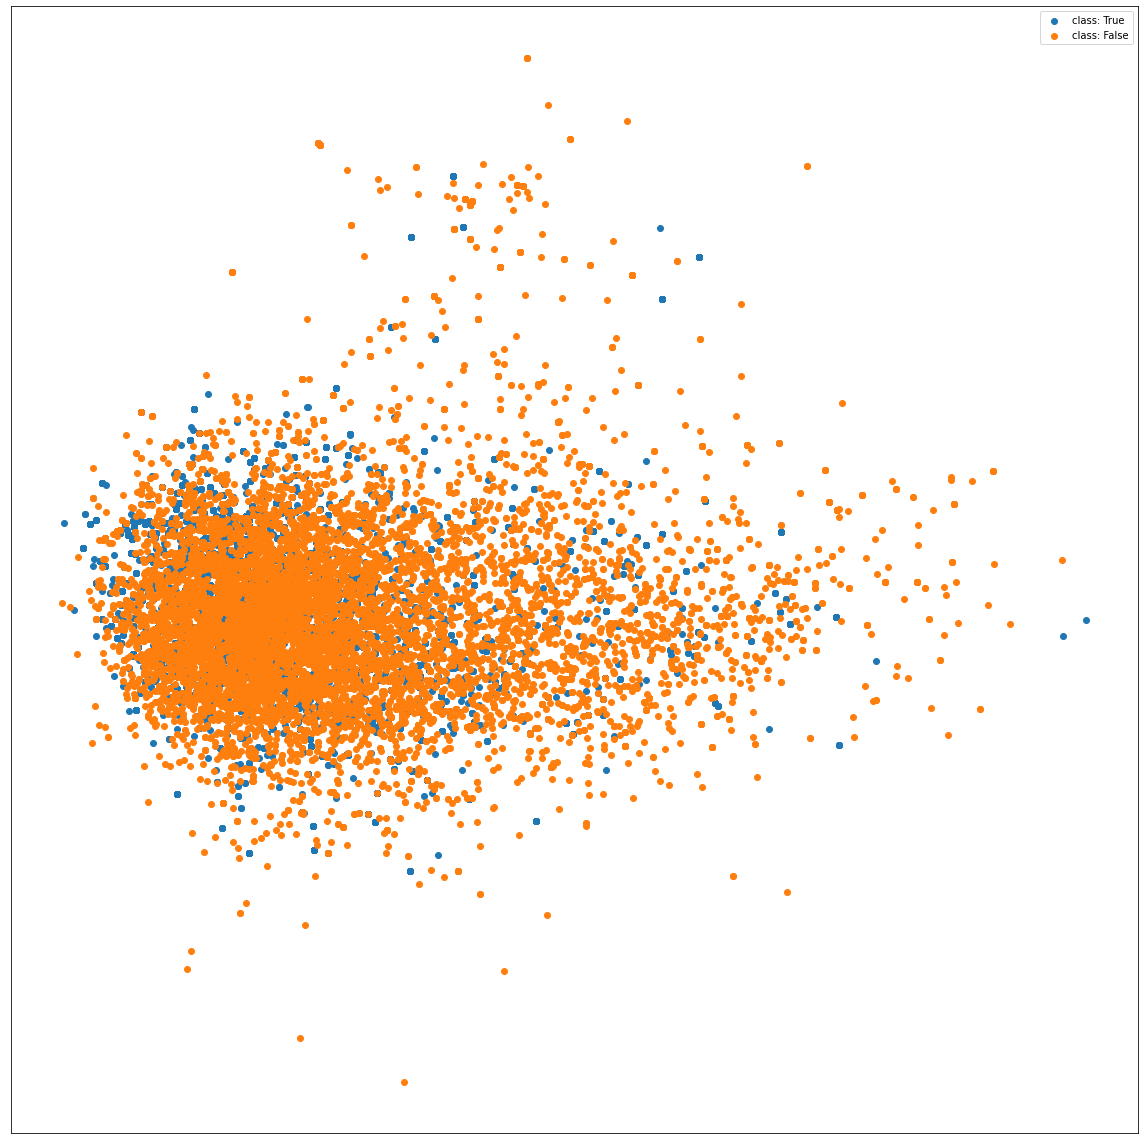

In [191]:
plot_2d_scatter(X_transformed[:,:2], targets)

### tSNE

In [167]:
from sklearn.manifold import TSNE

tsne = TSNE(n_iter=500, verbose=2)
X_tsne_embedded = tsne.fit_transform(X_scaled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 25171 samples in 0.059s...
[t-SNE] Computed neighbors for 25171 samples in 8.092s...
[t-SNE] Computed conditional probabilities for sample 1000 / 25171
[t-SNE] Computed conditional probabilities for sample 2000 / 25171
[t-SNE] Computed conditional probabilities for sample 3000 / 25171
[t-SNE] Computed conditional probabilities for sample 4000 / 25171
[t-SNE] Computed conditional probabilities for sample 5000 / 25171
[t-SNE] Computed conditional probabilities for sample 6000 / 25171
[t-SNE] Computed conditional probabilities for sample 7000 / 25171
[t-SNE] Computed conditional probabilities for sample 8000 / 25171
[t-SNE] Computed conditional probabilities for sample 9000 / 25171
[t-SNE] Computed conditional probabilities for sample 10000 / 25171
[t-SNE] Computed conditional probabilities for sample 11000 / 25171
[t-SNE] Computed conditional probabilities for sample 12000 / 25171
[t-SNE] Computed conditional probabilities for sam

In [188]:
def plot_2d_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for val in [True, False]:
        viral_indices = y == val
        plot.scatter(X[viral_indices, 0], X[viral_indices, 1], label="class: " + str(val))

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

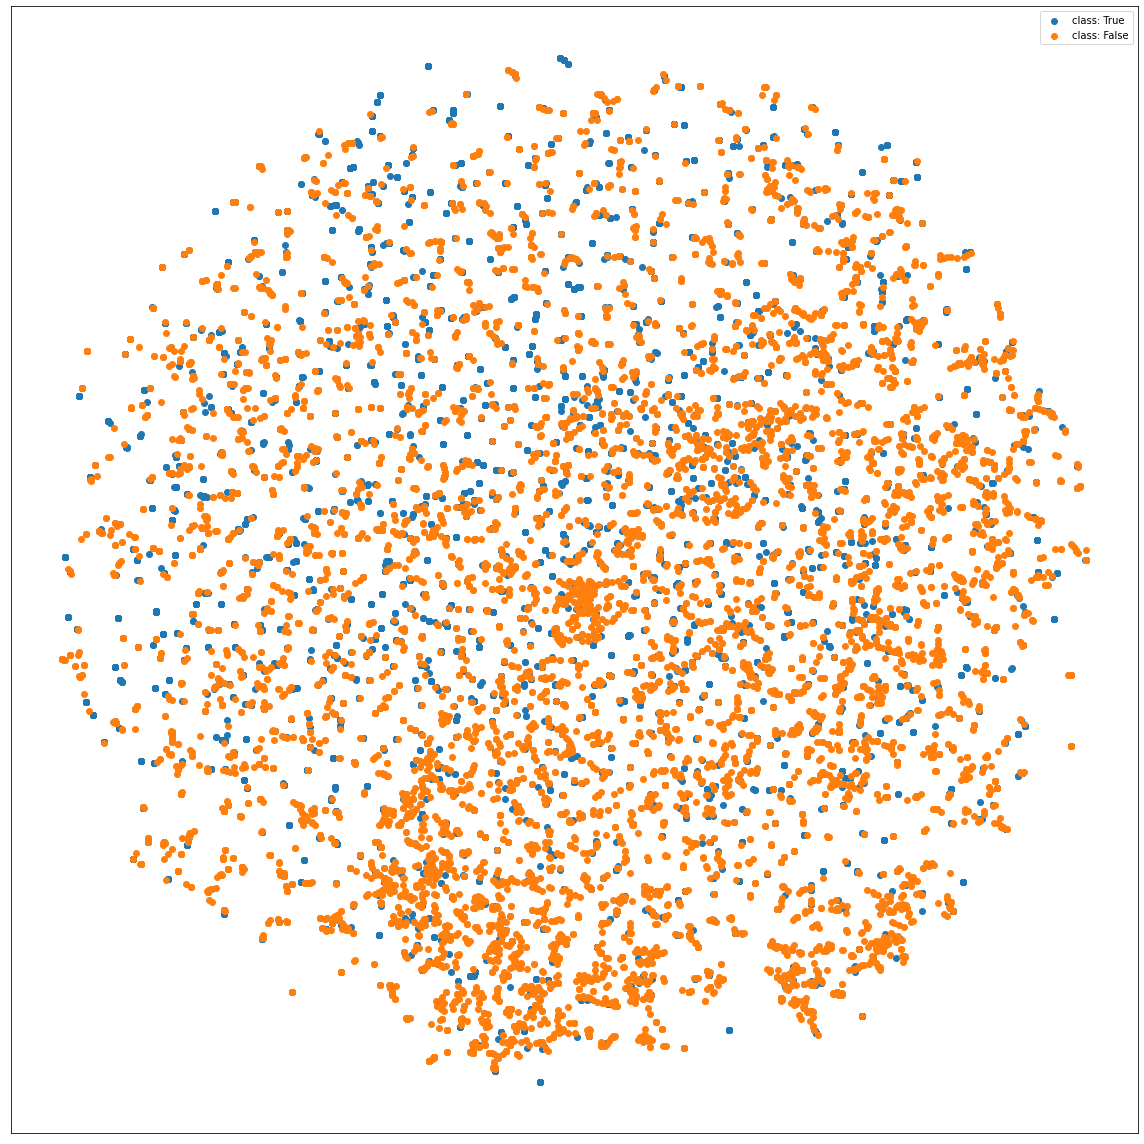

In [189]:
plot_2d_scatter(X_tsne_embedded, targets)